# Setup

In [ ]:
pip install shap

In [ ]:
# sys
import sys
import warnings

# numpy
import numpy
import numpy as np
from numpy import loadtxt

# pandas
import pandas
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib
import matplotlib.pyplot as plt
import matplotlib

# scikit-learn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#XGBoost
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#shap
import shap

In [ ]:
url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/diabetes.csv'
dataset = pd.read_csv(url)

# Exploratory Analysis

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.shape

(768, 9)

In [ ]:
# peek
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
# outcome distribution
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


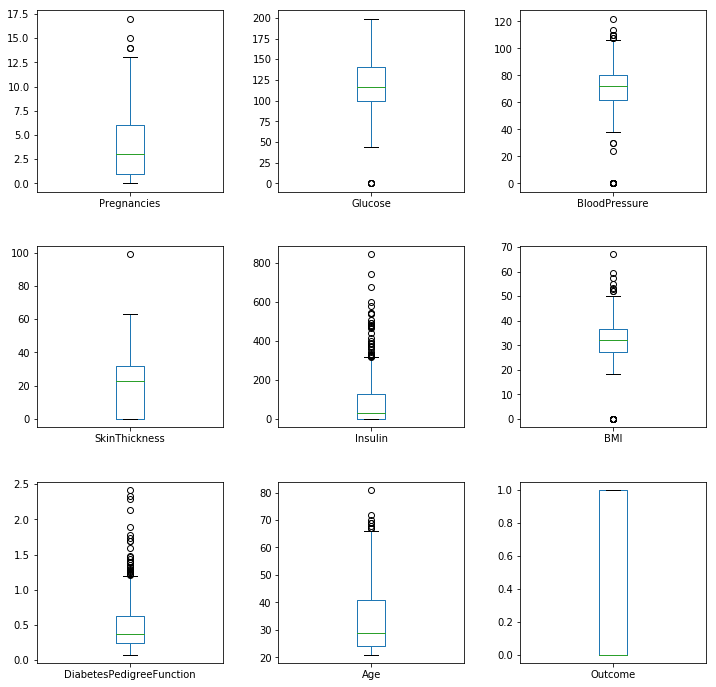

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, figsize=(12,12), layout=(3,3), sharex=False, sharey=False)
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

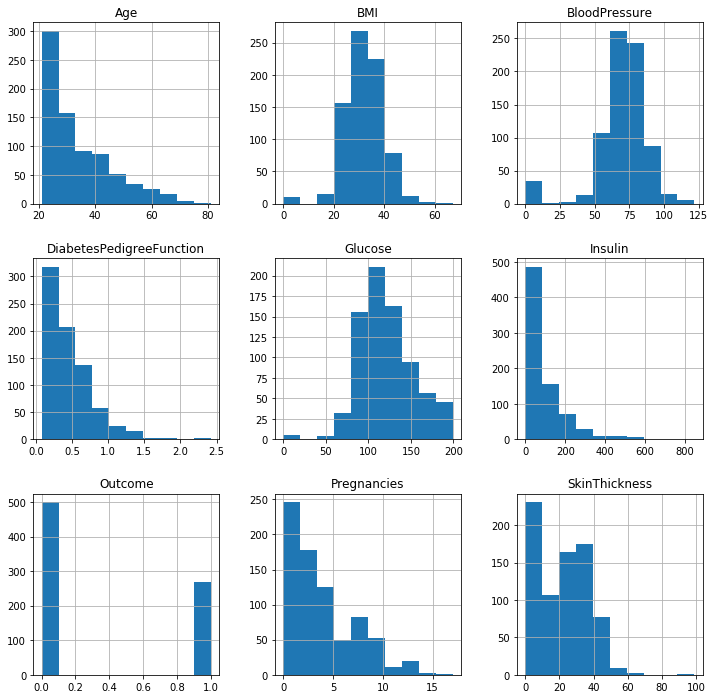

In [ ]:
# histograms
dataset.hist(figsize=(12,12))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

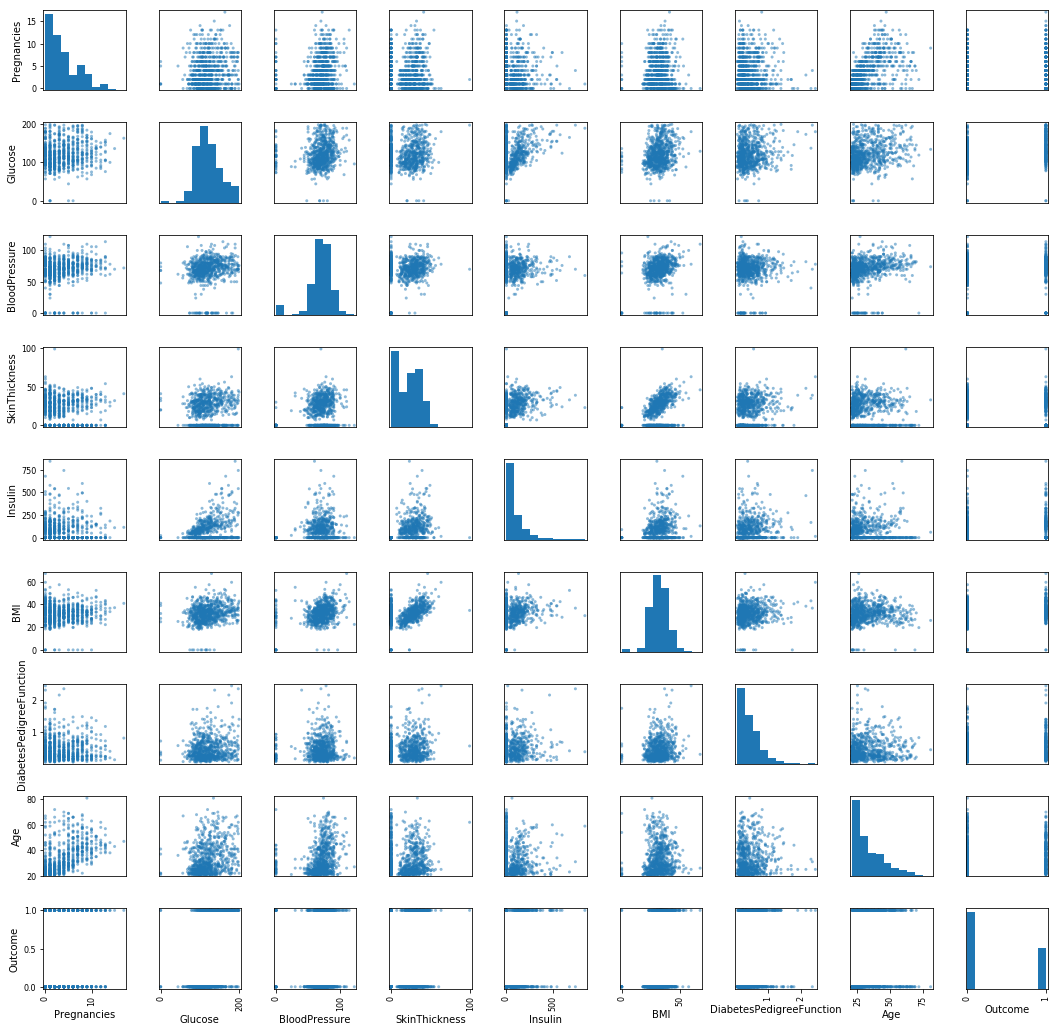

In [ ]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(18,18))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

# XGBoost Model

In [ ]:
train_data, test_data = train_test_split(dataset, test_size=0.2)
print(len(train_data), 'train examples')
print(len(test_data), 'test examples')
x_train = train_data.iloc[:,:8]
y_train = train_data.iloc[:,-1]
x_test = test_data.iloc[:,:8]
y_test = test_data.iloc[:,-1]

614 train examples
154 test examples


In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.62%


In [ ]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[88 12]
 [24 30]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



# Shap

In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

# Explain model predictions
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x_train)

# Visualize prediction explanation
shap.force_plot(explainer.expected_value, shap_values, x_train)

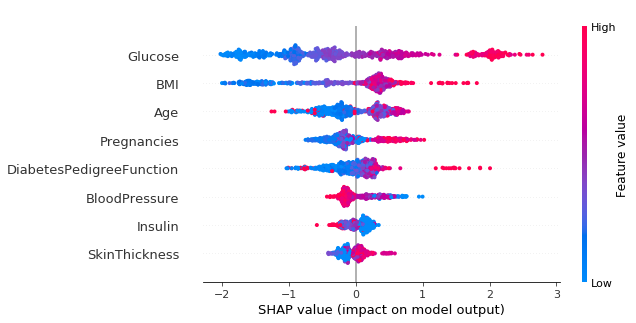

In [ ]:
# Shap summary
shap.summary_plot(shap_values, x_train)